<a href="https://colab.research.google.com/github/Blvisse/Notebook/blob/master/CAT1_CaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries and Dataset


In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.datasets import fetch_california_housing

## Loading Dataset

In [133]:
califroniaHousing=fetch_california_housing()

# Let's Explore what the Datset Offers

In [134]:
califroniaHousing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

The best thing to do first is go through the description file to learn the dataset

In [135]:
print(califroniaHousing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

We get to learn a lot about the data like how many rows it has and also the feature names and what they stand for
We get :

1.  we have 20640 rows and 8 columns 
2.  We do not hae any missing values 
3.  we have the legend of the columns




In [136]:
print(califroniaHousing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [137]:
print(califroniaHousing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


We load the features into X together with the feature names
We load the target to Y and give it a column name of 'SalePrice'

In [138]:
X=pd.DataFrame(califroniaHousing.data,columns=califroniaHousing.feature_names)
y=pd.DataFrame(califroniaHousing.target,columns=['SalePrice'])

# Explore features 

In [139]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


We learn there is no categorical data in this dataset 

In [140]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [141]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Concat the target and feature names as we aim to carry out EDA next

In [142]:
data=pd.concat([X,y],axis=1)

In [143]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Let's Carry out Exploratory Data Analysis

**This will help us understand more trends of the data by use of diagrams**

In [144]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


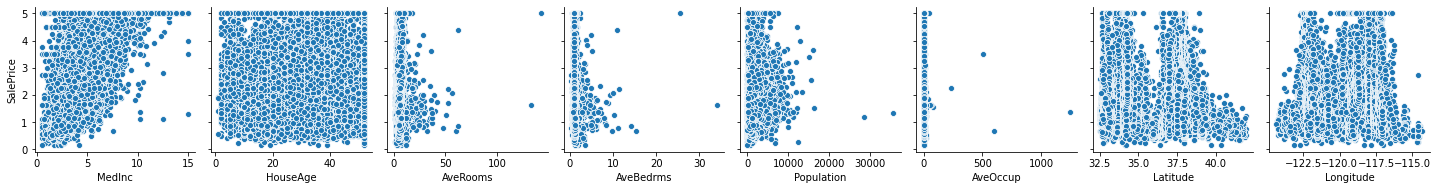

In [145]:
sns.pairplot(data,x_vars=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'],y_vars='SalePrice')

## Median Income vs TargetPrice

[]

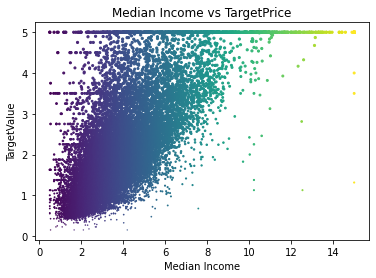

In [146]:
plt.scatter(data['MedInc'],data['SalePrice'],c=data['MedInc'],s=data['SalePrice'])
plt.colorbar
plt.title('Median Income vs TargetPrice')
plt.xlabel('Median Income')
plt.ylabel('TargetValue')
plt.plot()

We can see that as median Income increases the Value of House purchased increases.

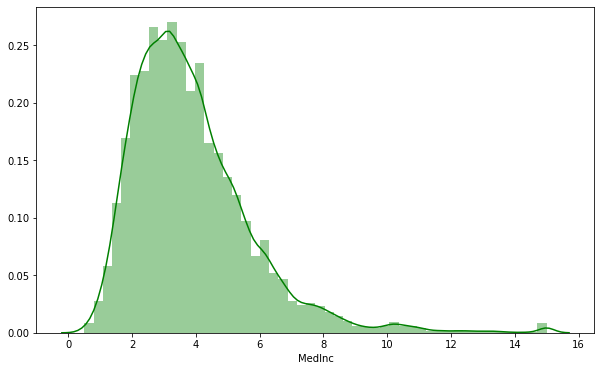

In [147]:
plt.figure(figsize=(10,6))
sns.distplot(data['MedInc'],color='green')

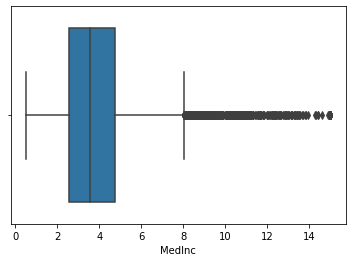

In [148]:
sns.boxplot(data['MedInc'])

We can see there exists some outliers in the data


[]

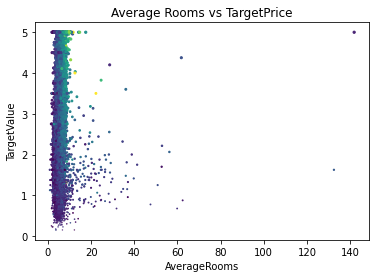

In [149]:
plt.scatter(data['AveRooms'],data['SalePrice'],c=data['MedInc'],s=data['SalePrice'])
plt.colorbar
plt.title('Average Rooms vs TargetPrice')
plt.xlabel('AverageRooms')
plt.ylabel('TargetValue')
plt.plot()

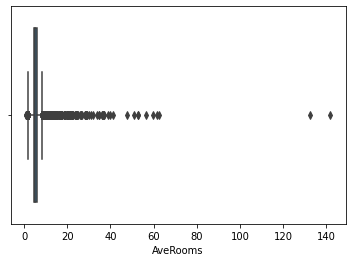

In [150]:
sns.boxplot(data['AveRooms'])

# Feature Selection


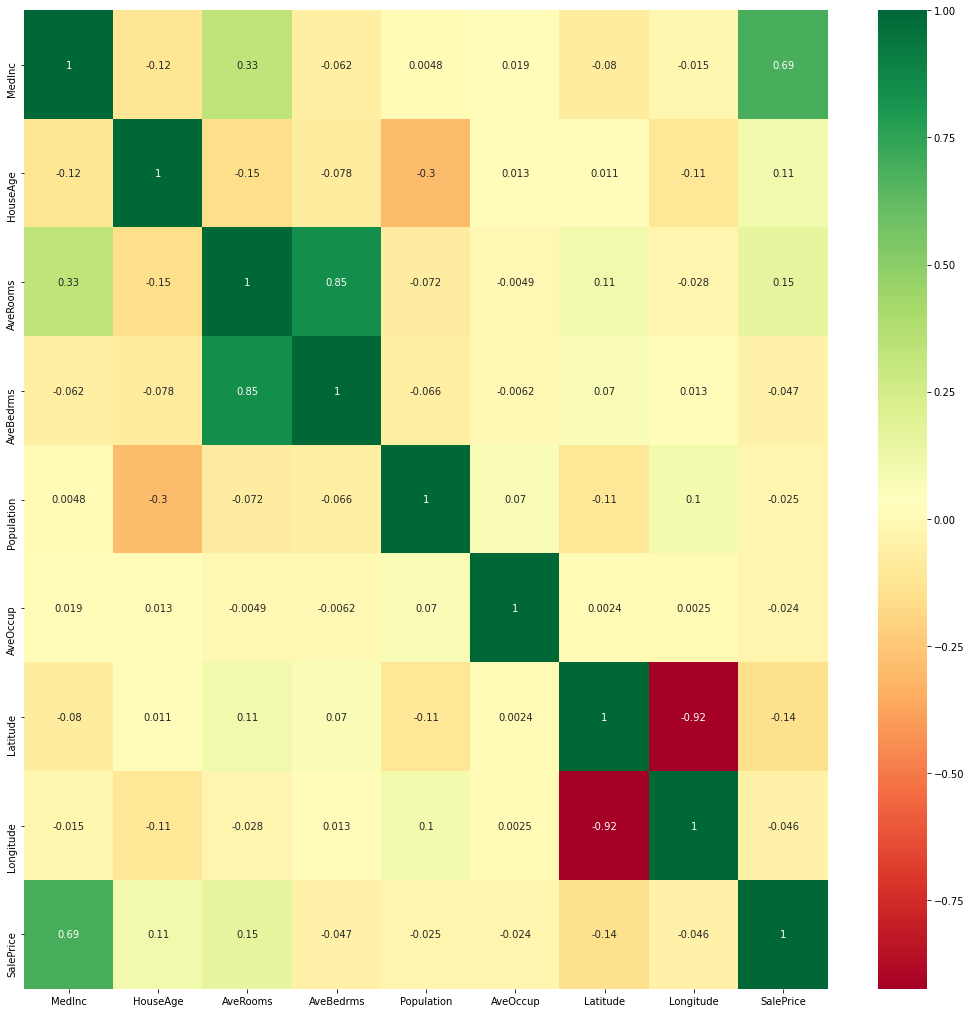

In [151]:
corrmat=data.corr()
best_corr_features=corrmat.index
plt.figure(figsize=(18,18))
maps=sns.heatmap(data[best_corr_features].corr(),annot=True,cmap='RdYlGn')


From what we see the longitudes and latitudes features are rather useless in our case prediction
So it's best to drop them 

In [152]:
X.drop('Longitude',axis=1,inplace=True)
X.drop('Latitude',axis=1,inplace=True)

In [153]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


## Feature Selection

In [154]:
newdata=pd.DataFrame(califroniaHousing.data,columns=califroniaHousing.feature_names)
newdata=pd

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [155]:
print(newdata)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]


In [156]:
column_names=califroniaHousing.feature_names
target=califroniaHousing.target
categorical_data=newdata
numerical=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']

for feature in column_names:
  categorical_data[feature]=categorical_data[feature].astype('category')

for feature in numerical:
  categorical_data[feature]= categorical_data[feature].cat.codes

categorical_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,12416,40,17422,4683,296,6200,37.88,-122.23
1,12411,20,15292,1747,2346,2171,37.86,-122.22
2,11941,51,18851,8436,469,9150,37.85,-122.24
3,10269,51,13297,8416,531,6102,37.85,-122.25
4,6656,51,15461,8951,538,2620,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,740,24,8473,11414,818,6253,39.48,-121.09
20636,3179,17,14726,13437,330,12675,39.49,-121.21
20637,1037,16,9514,10951,980,3757,39.43,-121.22
20638,1405,17,10299,12362,714,2249,39.43,-121.32


In [176]:
categorical_data.drop('Latitude',axis=1,inplace=True)
categorical_data.drop('Longitude',axis=1,inplace=True)
newdata=categorical_data.copy()
newData=pd.concat([newdata,y],axis=1)
newdata

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,12416,40,17422,4683,296,6200
1,12411,20,15292,1747,2346,2171
2,11941,51,18851,8436,469,9150
3,10269,51,13297,8416,531,6102
4,6656,51,15461,8951,538,2620
...,...,...,...,...,...,...
20635,740,24,8473,11414,818,6253
20636,3179,17,14726,13437,330,12675
20637,1037,16,9514,10951,980,3757
20638,1405,17,10299,12362,714,2249


In [178]:
X=newData.loc[:,newData.columns].values

# Carrying Out PCA

First of all we have to standardize X

In [179]:
sSC=StandardScaler()
X=sSC.fit_transform(X)
X

array([[ 1.88280191,  0.98214266,  1.39664548, ..., -1.28809653,
        -0.59536054,  2.12963148],
       [ 1.88133306, -0.60701891,  1.01265515, ...,  1.29226284,
        -1.34674917,  1.31415614],
       [ 1.74326137,  1.85618152,  1.65426152, ..., -1.07033937,
        -0.04520009,  1.25869341],
       ...,
       [-1.46000195, -0.92485123, -0.0289862 , ..., -0.4271376 ,
        -1.05096799, -0.99274649],
       [-1.35189475, -0.84539315,  0.11253136, ..., -0.76195496,
        -1.33220255, -1.05860847],
       [-0.95618715, -1.00430931,  0.02455611, ...,  0.05117292,
        -0.46033811, -1.01787803]])

### Next we carry out PCA

In [180]:
pca=PCA(tol=0.9)
pca1=pca.fit_transform(X)
pca1


array([[ 3.14980659, -1.72012426,  0.30654409, ...,  0.35884592,
         0.14726139,  0.08435322],
       [ 2.75999987,  0.47247979,  0.38824724, ..., -0.61499747,
        -0.88524668, -0.08514095],
       [ 2.43998895, -1.55856652,  0.04876271, ...,  1.38405205,
        -0.4632012 , -0.34322647],
       ...,
       [-1.34335978,  0.08984488, -1.89249896, ..., -0.87500236,
        -0.14778265,  0.4224074 ],
       [-1.23444687, -0.18441367, -2.33873431, ..., -0.8797745 ,
        -0.19111591,  0.26011025],
       [-1.13528016,  0.75671306, -1.72734227, ..., -0.36764473,
        -0.05536153,  0.03964316]])

In [181]:
pca.n_components_

7

In [182]:
pca.explained_variance_ratio_

array([0.30738893, 0.21111702, 0.17156673, 0.12913945, 0.10403463,
       0.05558004, 0.02117318])

## PCA with 2 components

In [183]:
pca= PCA(n_components=2)
pca2=pca.fit_transform(X)
pca_data=pd.DataFrame(pca2,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,SalePrice
0,3.149807,-1.720124,4.526
1,2.760000,0.472480,3.585
2,2.439989,-1.558567,3.521
3,1.637353,-1.963016,3.413
4,1.232461,-2.221450,3.422
...,...,...,...
20635,-1.695531,-0.225352,0.781
20636,-0.799852,0.588449,0.771
20637,-1.343360,0.089845,0.923
20638,-1.234447,-0.184414,0.847


In [184]:
pca.explained_variance_ratio_

array([0.30738893, 0.21111702])

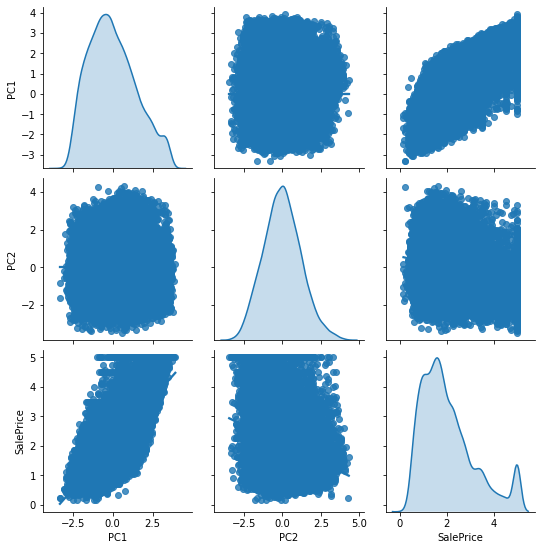

In [185]:
sns.pairplot(final_data,kind='reg', diag_kind='kde')

# SeaBorn Plot of Attributes against Target

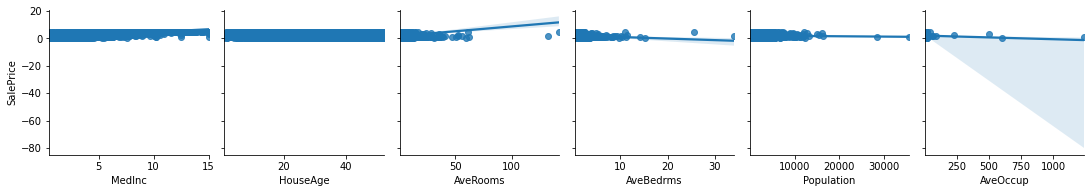

In [198]:
newData2=newData.copy()
newData2=pd.concat([newData,y],axis=1)
sns.pairplot(data,y_vars='SalePrice',x_vars=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup'],kind='reg',diag_kind='kde')


First we split the data

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Running through number of models to get the best

In [191]:
LR=LinearRegression()
LR.fit(X_train,y_train)
LR.coef_

array([[ 3.83075662e-16, -4.44089210e-16,  1.11022302e-16,
        -5.55111512e-16, -2.75821033e-16, -2.91433544e-16,
         1.15392820e+00]])

In [192]:
result={}
models={'Ridge':linear_model.Ridge(),
        'Lasso':linear_model.Lasso(),
        'LinearRegression':linear_model.LinearRegression(),
        }
for i in models:
  models[i].fit(X_train,y_train)
  accuracy=models[i].score(X_test,y_test)
  result[i]=[accuracy]
  pd.DataFrame(result)

In [193]:
kfold = KFold(n_splits=5)
for i in models:
  regressor = models[i]
  c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
  accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,Ridge,Lasso,LinearRegression
0,1.0,0.247926,1.0


In [194]:
for i in models:
  regressor = models[i]
  if i == 'Lasso':
    lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],'max_iter':[1000,1100,2000],'tol':[0.001,0.0001,0.000001]}
    grid = GridSearchCV(regressor,param_grid=lasso_params,cv=2,n_jobs=-1)
    results = grid.fit(X_train,y_train)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,Ridge,Lasso,LinearRegression
0,1.0,0.999699,1.0


In [195]:
for i in models:
  regressor = models[i]
  if i == 'Lasso':
    random = RandomizedSearchCV(regressor,param_distributions=lasso_params,cv=3,n_jobs=-1)
    results = random.fit(X_train,y_train)
    print(results.best_score_)
    print("Best Params are ", results.best_params_)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

0.9996991728641285
Best Params are  {'tol': 0.0001, 'max_iter': 2000, 'alpha': 0.02}


,Ridge,Lasso,LinearRegression
0,1.0,0.999699,1.0


In [196]:
regressor.score(X_test,y_test)

1.0

We choose the LinearRegression

In [174]:
LR=LinearRegression()
LR.fit(X_train,y_train)
LR.coef_


array([[-7.64979956e-17, -1.11022302e-16,  5.55111512e-17,
        -4.16333634e-16,  1.35308431e-16, -5.55111512e-17,
        -3.19189120e-16, -2.99239800e-16,  1.15392820e+00]])

In [175]:
predictions=LR.predict(X_train)
predictedData=({'Actual': y_test, 'Predicted': predictions})
